In [1]:
### Version : Python 3.10.12
### Coding : UTF-8

In [15]:
### We import packages

# To manage dataframes
import numpy as np
import pandas as pd

# To do the clustering
from sklearn.cluster import KMeans

# To realize graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

# To perform linear and polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
quadratic_transformation = PolynomialFeatures(2,include_bias = False).fit_transform
import sklearn.metrics
from sklearn.model_selection import train_test_split

# To fit the catenary curve
from scipy.optimize import curve_fit
import math

In [3]:
### We import our python files

import clustering

In [4]:
### We import our dataframes

lidar_easy = clustering.lidar_easy
lidar_medium = clustering.lidar_medium
lidar_hard = clustering.lidar_hard
lidar_extrahard = clustering.lidar_extrahard

list_df = clustering.list_df

In [5]:
# We check what the dataframes look like
lidar_easy.head(n = 5)

,index,x,y,z,x_norm,y_norm,z_norm,x_rotated,y_rotated,cluster
0,0,12.027449,-21.919416,11.557937,0.970574,0.010484,0.956772,0.045431,-25.002366,2
1,7,11.780415,-21.631120,11.554015,0.960897,0.016961,0.954437,-0.033131,-24.630925,2
2,8,11.802714,-21.606439,11.468175,0.961770,0.017515,0.903337,-0.001729,-24.619956,2
3,12,11.725748,-21.450815,11.473142,0.958755,0.021011,0.906293,0.005343,-24.446484,2
4,13,11.658920,-21.392229,11.492596,0.956138,0.022327,0.917874,-0.025213,-24.363030,2


Linear model RMSE : 0.06442206953888475
Quadratic model RMSE : 0.06445647690815502


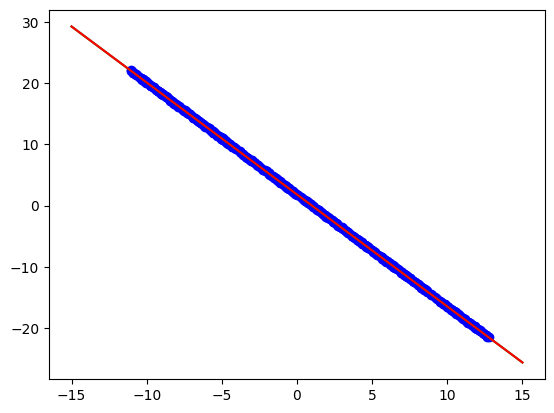

Linear model RMSE : 0.05627222954946186
Quadratic model RMSE : 0.05633174087450873


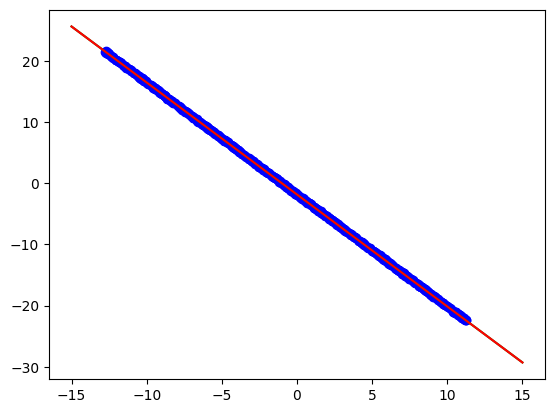

Linear model RMSE : 0.060670438294311846
Quadratic model RMSE : 0.060685907505514086


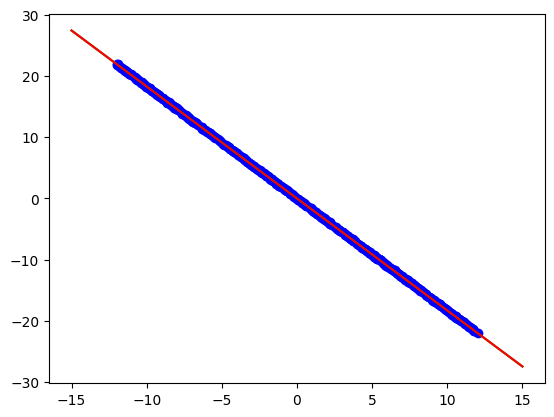

Linear model RMSE : 0.057851205110224894
Quadratic model RMSE : 0.05767705205649447


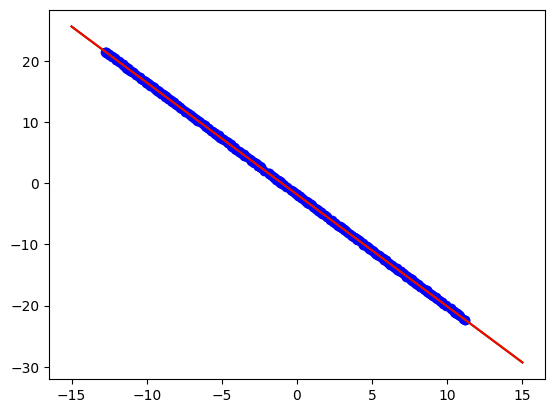

Linear model RMSE : 0.05538494037890889
Quadratic model RMSE : 0.05566027158966673


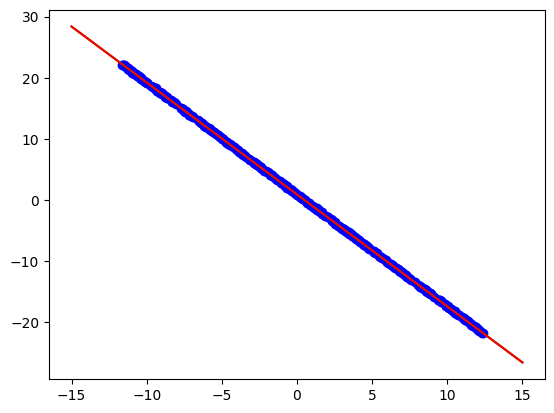

Linear model RMSE : 0.06660614422586456
Quadratic model RMSE : 0.06662446867929765


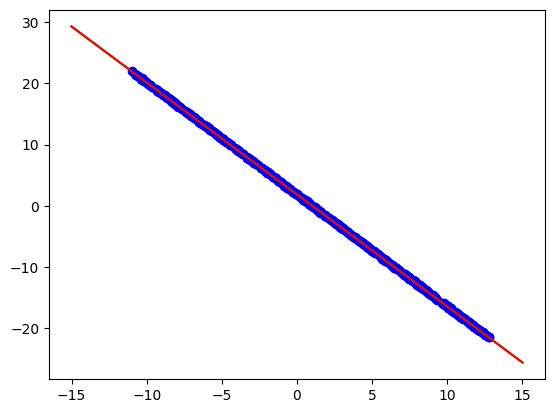

Linear model RMSE : 0.05715066907666968
Quadratic model RMSE : 0.05702837443456096


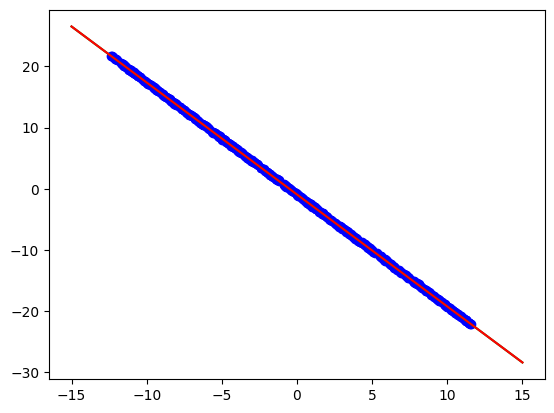

Linear model RMSE : 0.057644084896106285
Quadratic model RMSE : 0.05767543201686352


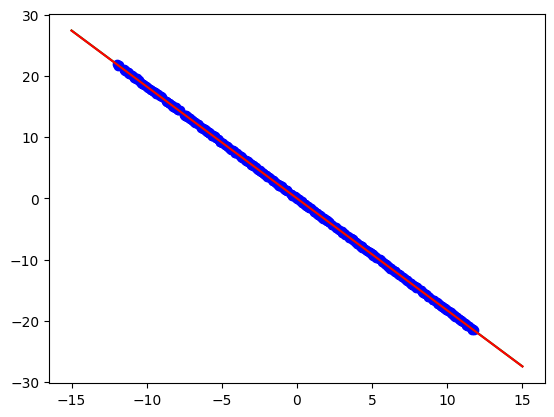

Linear model RMSE : 0.06043139283569353
Quadratic model RMSE : 0.06020682967989656


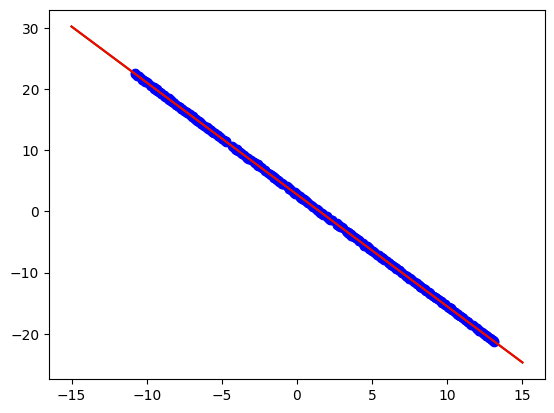

Linear model RMSE : 0.06027987825796497
Quadratic model RMSE : 0.06022522119708964


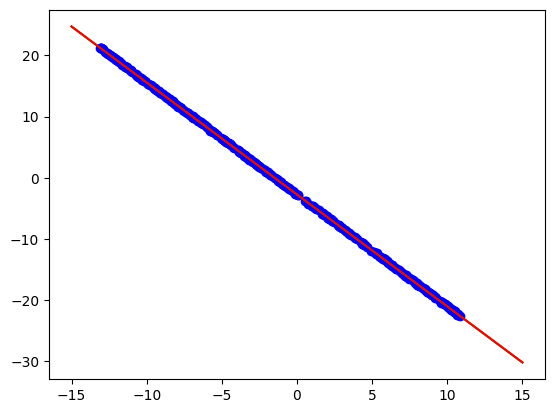

Linear model RMSE : 0.06414731220350207
Quadratic model RMSE : 0.0633640490882254


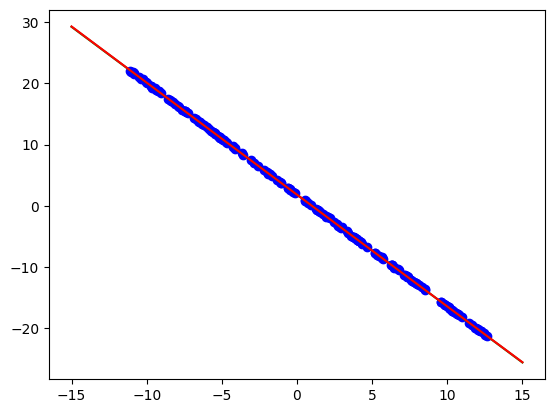

Linear model RMSE : 0.062116363344686794
Quadratic model RMSE : 0.06221923112649874


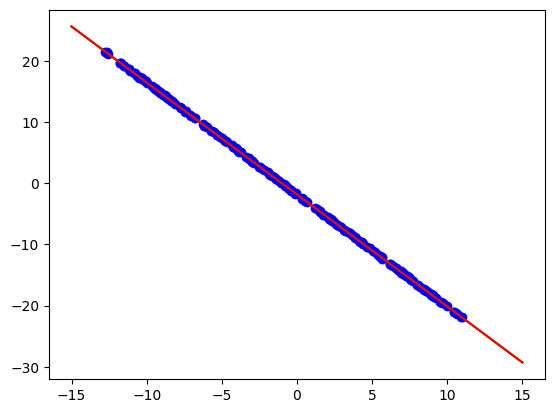

Linear model RMSE : 0.06376320116512531
Quadratic model RMSE : 0.06335191126701822


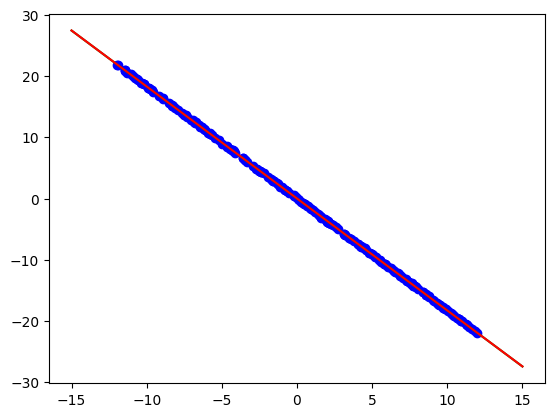

Linear model RMSE : 0.25906949312152383
Quadratic model RMSE : 0.061356034110842755


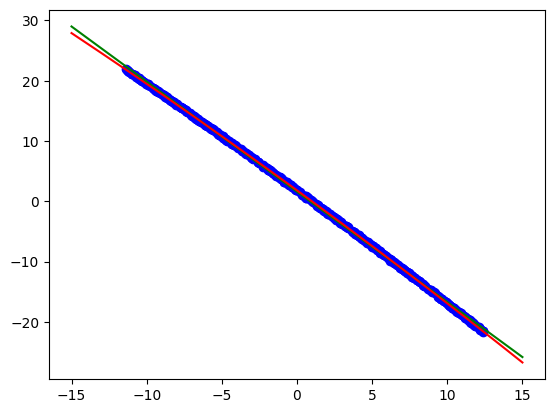

Linear model RMSE : 0.33003395637485494
Quadratic model RMSE : 0.07018321131561446


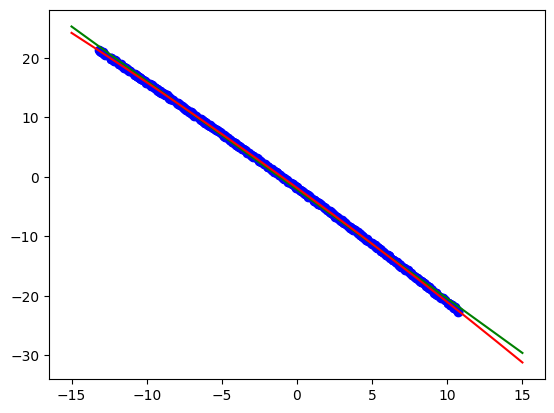

Linear model RMSE : 0.15727633656665296
Quadratic model RMSE : 0.06290614929547911


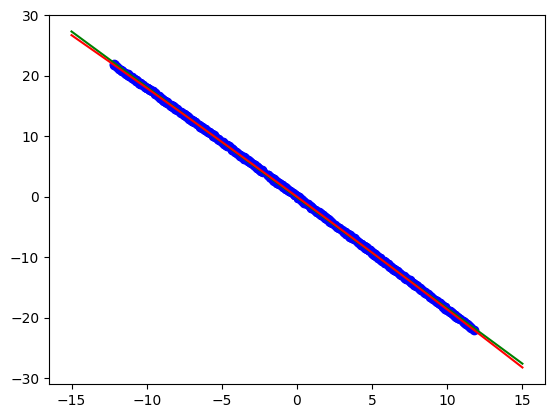

[['linear', 'linear', 'linear'],
 ['quadratic',
  'linear',
  'linear',
  'quadratic',
  'linear',
  'quadratic',
  'quadratic'],
 ['quadratic', 'linear', 'quadratic'],
 ['quadratic', 'quadratic', 'quadratic']]

In [6]:
### We find the plane of best fit for each cluster
# To do so, we compare a linear and a quadratic regression of y on x
# We keep the best model in a list

list_model = []

for df in list_df :
    df_models = []
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        x = df[df['cluster'] == cluster]['x'].values.reshape(-1, 1)
        y = df[df['cluster'] == cluster]['y'].values
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

        linear_model = LinearRegression().fit(X_train, y_train)
        y_linear_pred = linear_model.predict(X_test)
        rmse_linear = sklearn.metrics.mean_squared_error(y_test, y_linear_pred, squared = False)
        print(f"Linear model RMSE : {rmse_linear}")
        
        quadratic_model = LinearRegression().fit(quadratic_transformation(X_train), y_train)
        y_quadratic_pred = quadratic_model.predict(quadratic_transformation(X_test))
        rmse_quadratic = sklearn.metrics.mean_squared_error(y_test, y_quadratic_pred, squared = False)
        print(f"Quadratic model RMSE : {rmse_quadratic}")

        x_plot = np.linspace(-15, 15, 500).reshape(-1,1)
        y_linear_plot = linear_model.predict(x_plot)
        y_quadratic_plot = quadratic_model.predict(quadratic_transformation(x_plot))

        plt.scatter(x, y, color = 'blue')
        plt.plot(x_plot, y_linear_plot, color = 'green')
        plt.plot(x_plot, y_quadratic_plot, color = 'red')
        plt.show()

        if rmse_linear < rmse_quadratic :
            model = "linear"
        else :
            model = "quadratic"

        df_models.append(model)
    list_model.append(df_models)

list_model



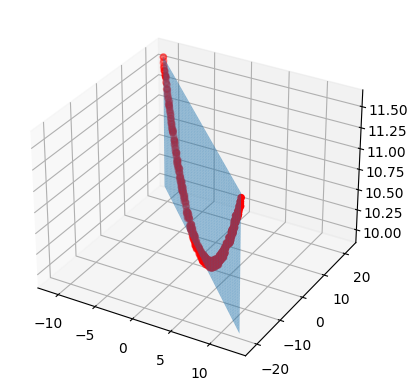

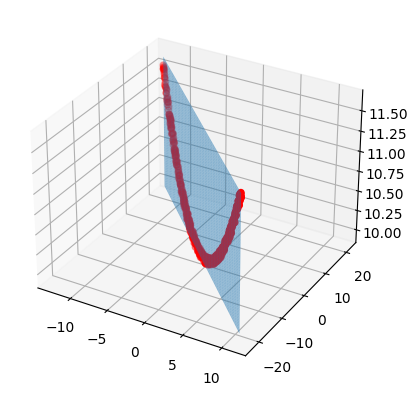

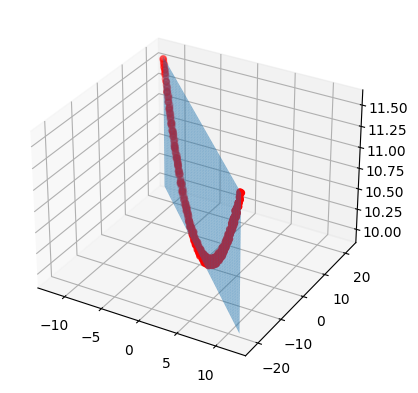

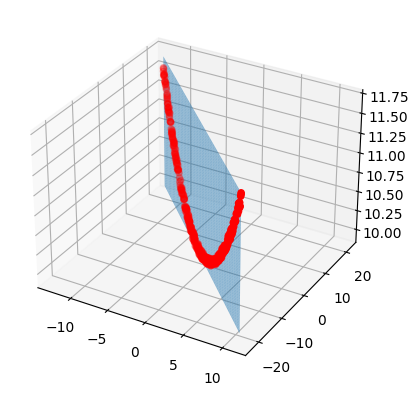

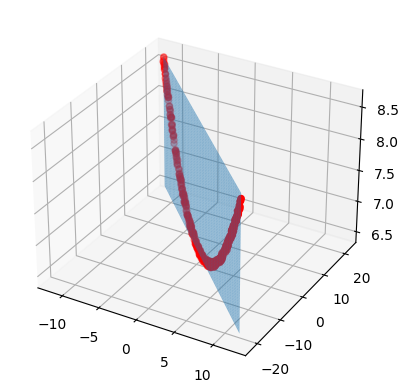

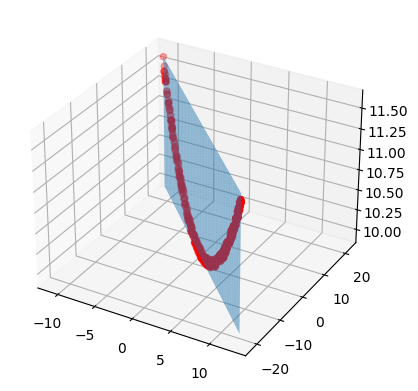

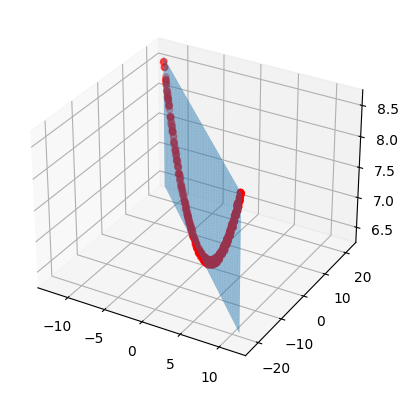

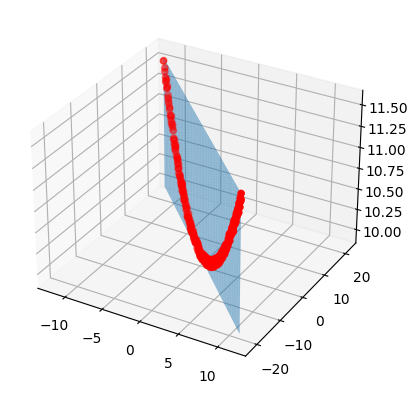

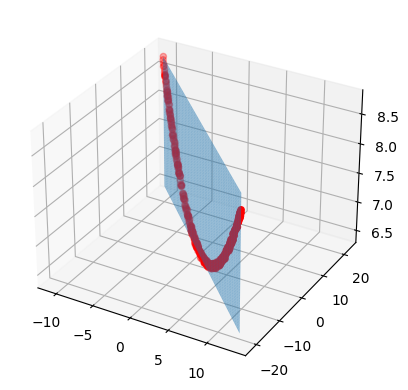

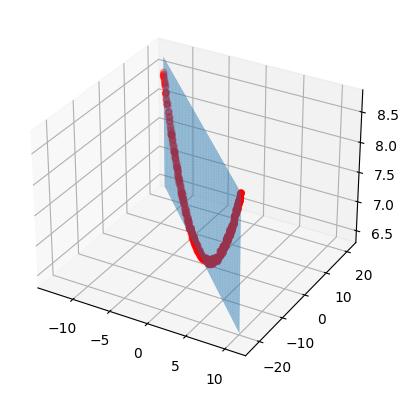

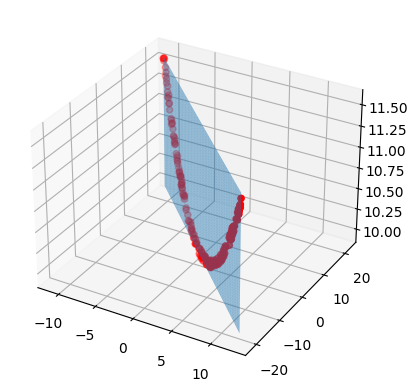

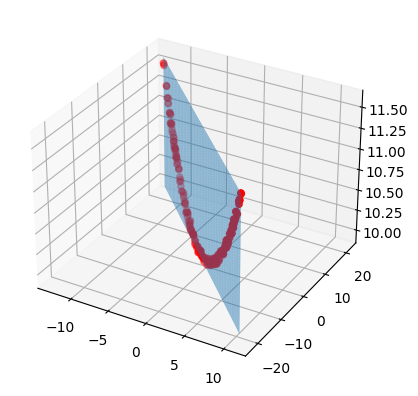

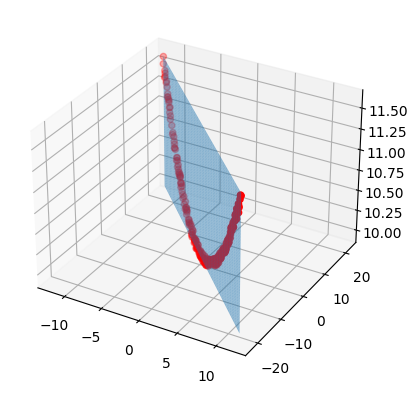

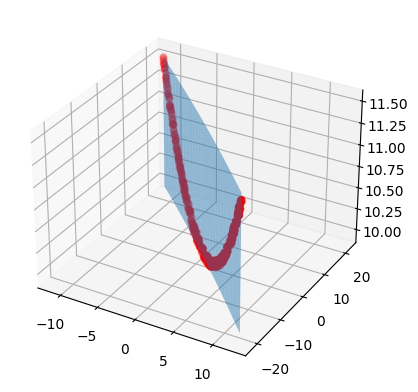

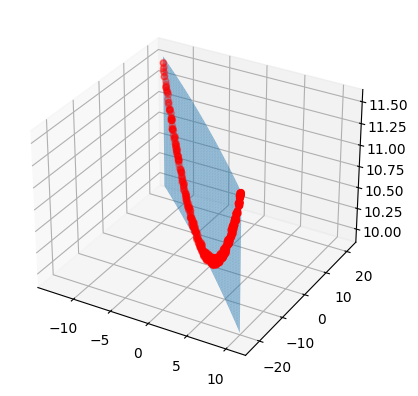

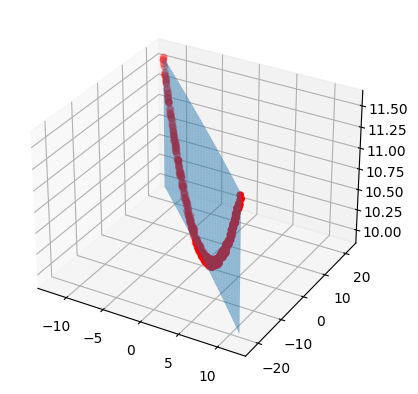

In [14]:
# We visualize the different planes of best fit

i = 0
for df in list_df :
    j = 0
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        x = df[df['cluster'] == cluster]['x'].values
        y = df[df['cluster'] == cluster]['y'].values
        z = df[df['cluster'] == cluster]['z'].values

        if list_model[i][j] == 'linear' :
            model = LinearRegression().fit(x.reshape(-1, 1), y)
        else :
            model = LinearRegression().fit(quadratic_transformation(x.reshape(-1, 1)), y)
        
        xs = np.linspace(min(x), max(x), 500)
        zs = np.linspace(min(z), max(z), 500)
        X, Z = np.meshgrid(xs, zs)
        if list_model[i][j] == 'linear' :
            Y = model.predict(xs.reshape(-1,1))
        else :
            Y = model.predict(quadratic_transformation(xs.reshape(-1,1)))

        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        ax.scatter(x, y, z, color = 'red', marker = 'o')
        ax.plot_surface(X, Y, Z, alpha = 0.5)
        plt.show()

        j += 1
    i += 1


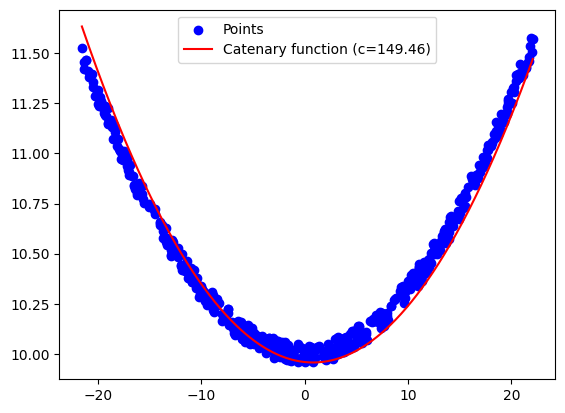

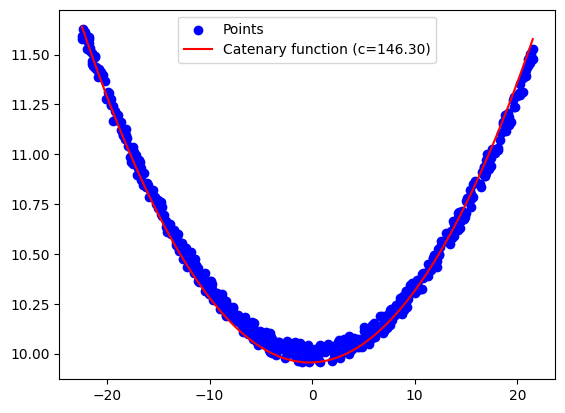

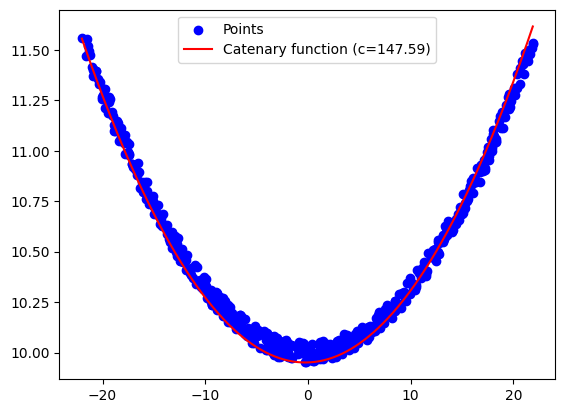

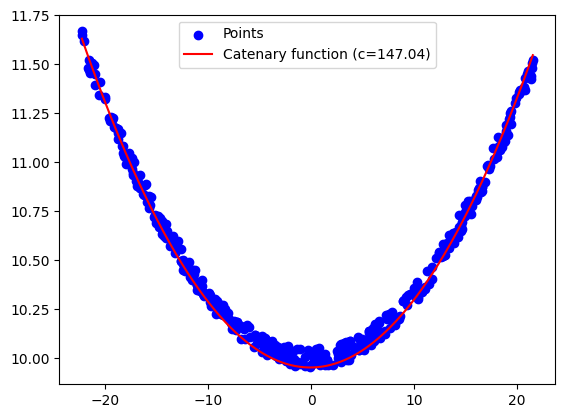

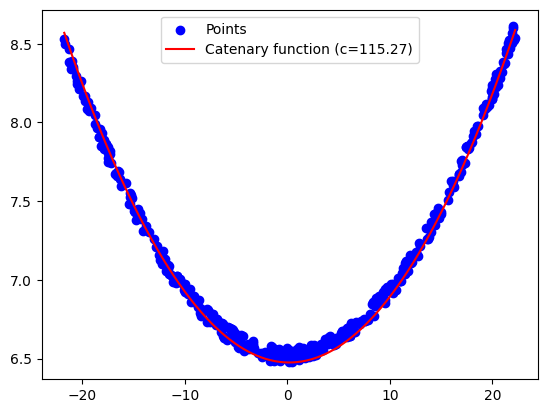

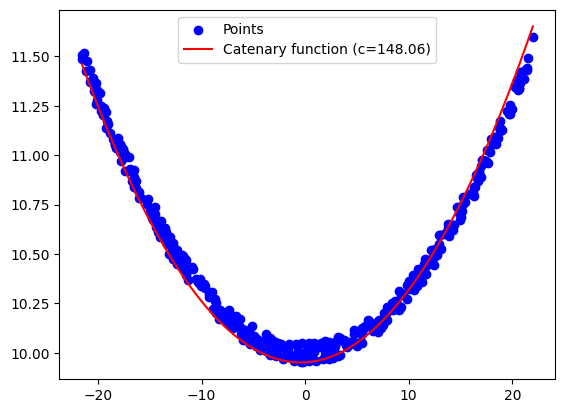

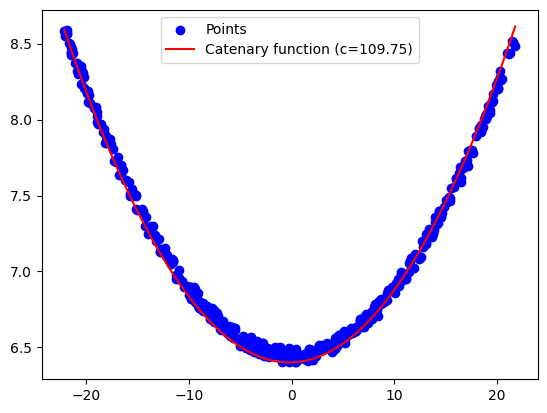

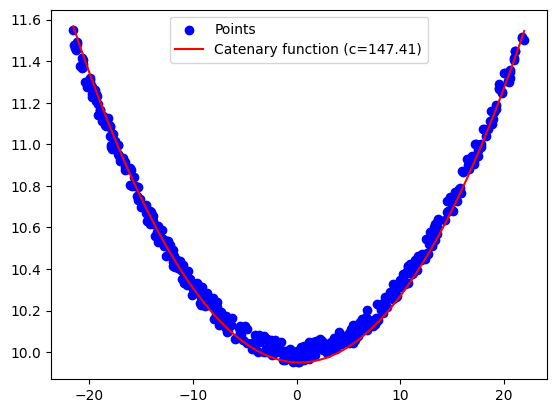

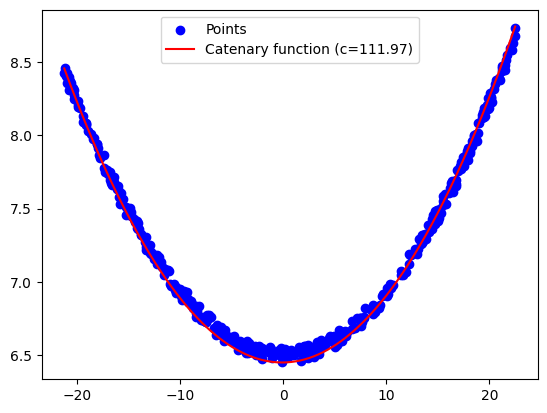

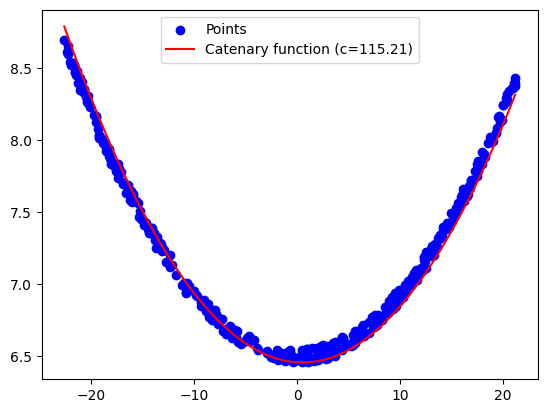

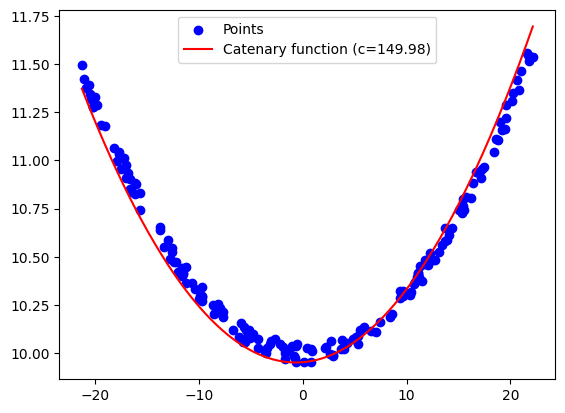

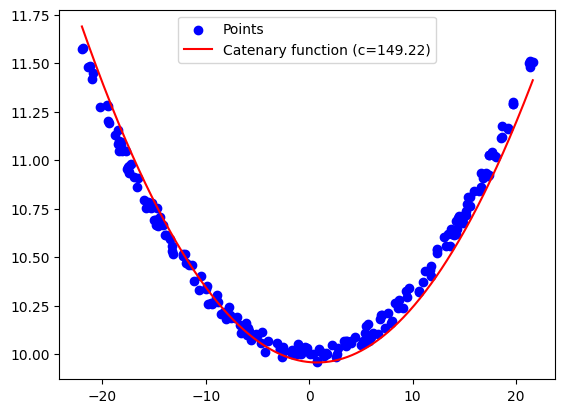

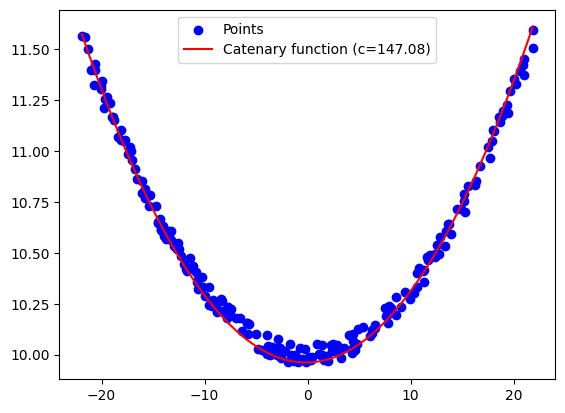

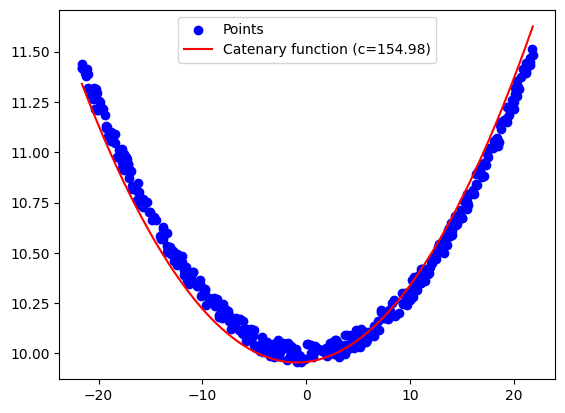

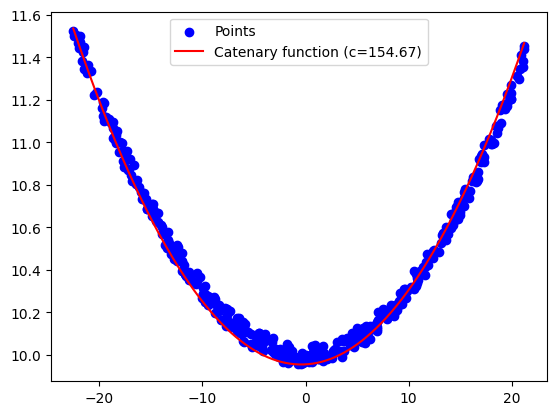

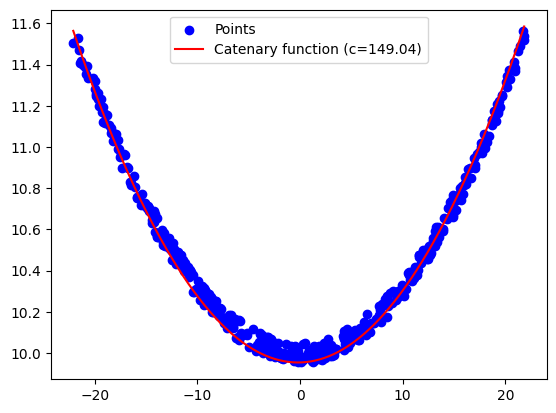

In [19]:
### We determine the coefficient c of the catenary equation
# To do so, we look for the best fit between predicted y and z coordinates, given the catenary function

i = 0
for df in list_df :
    j = 0
    list_cluster = sorted(list(set(df['cluster'])))
    for cluster in list_cluster :
        x = df[df['cluster'] == cluster]['x'].values
        y = df[df['cluster'] == cluster]['y'].values
        z = df[df['cluster'] == cluster]['z'].values

        if list_model[i][j] == 'linear' :
            model = LinearRegression().fit(x.reshape(-1, 1), y)
            y_pred = model.predict(x.reshape(-1, 1))
        else :
            model = LinearRegression().fit(quadratic_transformation(x.reshape(-1, 1)), y)
            y_pred = model.predict(quadratic_transformation(x.reshape(-1, 1)))

        # We get the index of the min of the z coordinates
        index_min_z = np.argmin(z)
        y0 = y_pred[index_min_z]
        z0 = z[index_min_z]            
        # We define our catenary function
        def function_catenary(y, c):
            return z0 + c * (np.cosh((y - y0)/c) - 1)
        # We fit the function to the points
        param_estim, _ = curve_fit(function_catenary, y_pred, z)
        # We visualize the fit
        plt.scatter(y_pred, z, color = 'blue', label = 'Points')
        y_range = np.linspace(min(y_pred), max(y_pred), 500)
        z_estim = function_catenary(y_range, param_estim[0])
        plt.plot(y_range, z_estim, color = 'red', label = f'Catenary function (c={param_estim[0]:.2f})')
        plt.legend(loc = 'upper center')
        plt.show()
        j += 1
    i += 1
